<a href="https://colab.research.google.com/github/yuvaran/ML/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Detecting Malicious URL using Machine Learning:**

#library imported:

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Read the Dataset:

In [7]:
import pandas as pd

# Try reading the file with a different encoding
urls_data = pd.read_csv("/content/urldata.csv", encoding='latin-1')

In [9]:
urls_data.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0.0
1,1,https://www.youtube.com,benign,0.0
2,2,https://www.facebook.com,benign,0.0
3,3,https://www.baidu.com,benign,0.0
4,4,https://www.wikipedia.org,benign,0.0


In [10]:
urls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450303 entries, 0 to 450302
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  450303 non-null  object 
 1   url         450185 non-null  object 
 2   label       450176 non-null  object 
 3   result      450167 non-null  float64
dtypes: float64(1), object(3)
memory usage: 13.7+ MB


In [11]:
urls_data.tail(20)

,Unnamed: 0,url,label,result
450283,450156,http://orlandoresorthouses.com/wwe/script/mail...,malicious,1.0
450284,450157,http://knitwear.ru/Linkedlnen.html,malicious,1.0
450285,450158,http://dizcorona.com/Via/Validation,malicious,1.0
450286,450159,http://ayareview-document.pdf-iso.webapps-secu...,malicious,1.0
450287,450160,http://www.rosespa.com.sg/ipic/Dirk/index.php,malicious,1.0
450288,450161,http://facebookauthorization.whatsgratis.com/f/,malicious,1.0
450289,450162,"http://u.to/vYjNDw,Pattern",malicious,1.0
450290,450163,https://insidethestorex.com/sd/,malicious,1.0
450291,450164,http://youthsocialcircle.com/docs/Womsdhgdfhds...,malicious,1.0
450292,450165,http://perrottaimmobiliare.it/img/immobiliari/...,malicious,1.0


In [12]:
urls_data.describe().T

,count,mean,std,min,25%,50%,75%,max
result,450167.0,0.231978,0.422096,0.0,0.0,0.0,0.0,1.0


In [13]:
urls_data.shape

(450303, 4)

In [14]:
urls_data.describe(include='object')

,Unnamed: 0,url,label
count,450303,450185,450176
unique,450210,450170,3
top,.,malicious,benign
freq,33,9,345738


In [15]:
 # The names of the features
print("The names of the features :\n", list(urls_data.columns))

The names of the features :
 ['Unnamed: 0', 'url', 'label', 'result']


In [16]:
urls_data.isnull().sum()

Unnamed: 0      0
url           118
label         127
result        136
dtype: int64

In [17]:
urls_data['label'].value_counts()

label
benign       345738
malicious    104429
1                 9
Name: count, dtype: int64

In [18]:
urls_data['url'].value_counts()

url
malicious                                                                                                                                          9
http://www                                                                                                                                         8
https://www.google.com                                                                                                                             1
https://www.t411.me/torrents/The_Sainte_Catherines__mtl___2010_-_Fire_Works__dvdfan_?old=1                                                         1
https://www.tabnabber.com/band_songs.aspx?music=Patrick+Watson                                                                                     1
                                                                                                                                                  ..
https://www.billboard.com/artist/alvino-rey/discography/compilations/9479?sort=alphabet               

In [19]:
urls_data = urls_data.drop_duplicates()
urls_data.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0.0
1,1,https://www.youtube.com,benign,0.0
2,2,https://www.facebook.com,benign,0.0
3,3,https://www.baidu.com,benign,0.0
4,4,https://www.wikipedia.org,benign,0.0


#Dataset Cleaning:

In [20]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/') # make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-') # make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.') # make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
            total_Tokens = total_Tokens + tokens + tkns_ByDot
            total_Tokens = list(set(total_Tokens))  #remove redundant tokens
        if 'com' in total_Tokens:
            total_Tokens.remove('com') # removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

#Features and labels :

In [21]:
url_list = urls_data["url"]
y = urls_data["label"]

Importing packages :

In [22]:

from sklearn.feature_extraction.text import TfidfVectorizer

Convert the text data into vectors of numbers :

In [23]:
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [24]:
url_list = [str(url) for url in url_list]

In [25]:
X = vectorizer.fit_transform(url_list)

Dataset splitting :

In [26]:

from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

<360168x780430 sparse matrix of type '<class 'numpy.float64'>'
	with 3568416 stored elements in Compressed Sparse Row format>

In [29]:
y_train

347976    malicious
297121       benign
87581        benign
218443       benign
107592       benign
            ...    
259178       benign
365838    malicious
131932       benign
146867       benign
121958       benign
Name: label, Length: 360168, dtype: object

In [30]:
X_test

<90042x780430 sparse matrix of type '<class 'numpy.float64'>'
	with 893074 stored elements in Compressed Sparse Row format>

In [31]:
y_test

56474        benign
239941       benign
12872        benign
159205       benign
316206       benign
            ...    
21257        benign
366534    malicious
73459        benign
390303    malicious
200329       benign
Name: label, Length: 90042, dtype: object

In [32]:
# Print counts of each class
print("- Counting Splits -")
print("Training Samples:", len(y_train))
print("Testing Samples:", len(y_test))

- Counting Splits -
Training Samples: 360168
Testing Samples: 90042


Model building using LogisticRegression :

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logit = LogisticRegression()

Fitting algorithm

In [37]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming y_train is a Pandas Series, replace NaN with a suitable value, e.g., the most frequent value
y_train = y_train.fillna(y_train.mode()[0])  # Fill NaN with the most frequent value

logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [40]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming y_train is a Pandas Series, replace NaN with a suitable value, e.g., the most frequent value
y_train = y_train.fillna(y_train.mode()[0])  # Fill NaN with the most frequent value

logit = LogisticRegression()
logit.fit(X_train, y_train)

# Convert y_test to numerical labels if it contains strings
if y_test.dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_test = le.fit_transform(y_test)

print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.0


In [39]:
print("Accuracy ",logit.score(X_test, y_test))

TypeError: '<' not supported between instances of 'float' and 'str'

Visualizing the data:

In [ ]:
df= pd.read_csv("urldata.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['url']= label_encoder.fit_transform(df['url'])
df['label']= label_encoder.fit_transform(df['label'])

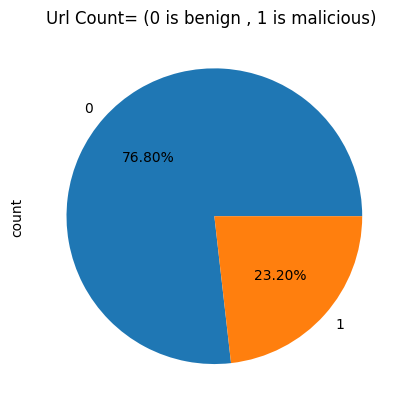

In [ ]:
# Phishing Count in pie chart

df['result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Url Count= (0 is benign , 1 is malicious) ")
plt.show()

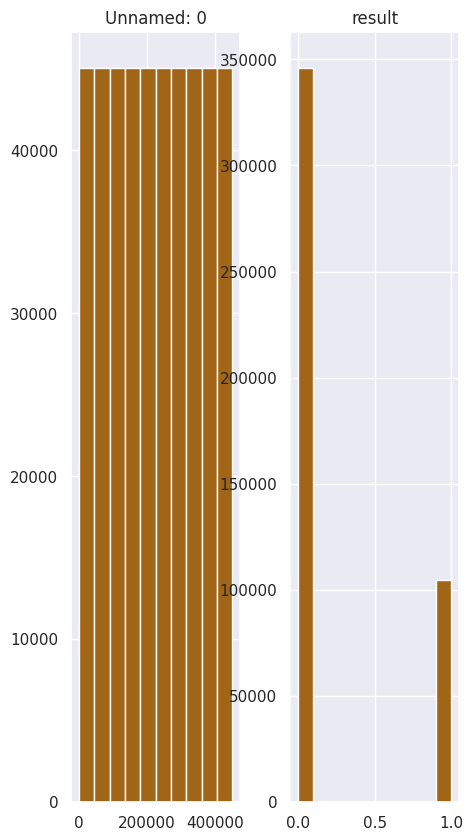

In [ ]:
sns.set(palette='BrBG')
urls_data.hist(figsize=(5,10));

array([[<Axes: title={'center': 'result'}>]], dtype=object)

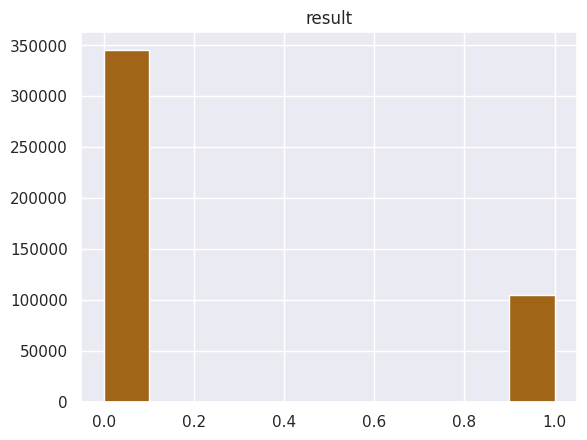

In [ ]:
urls_data.hist(column='result')

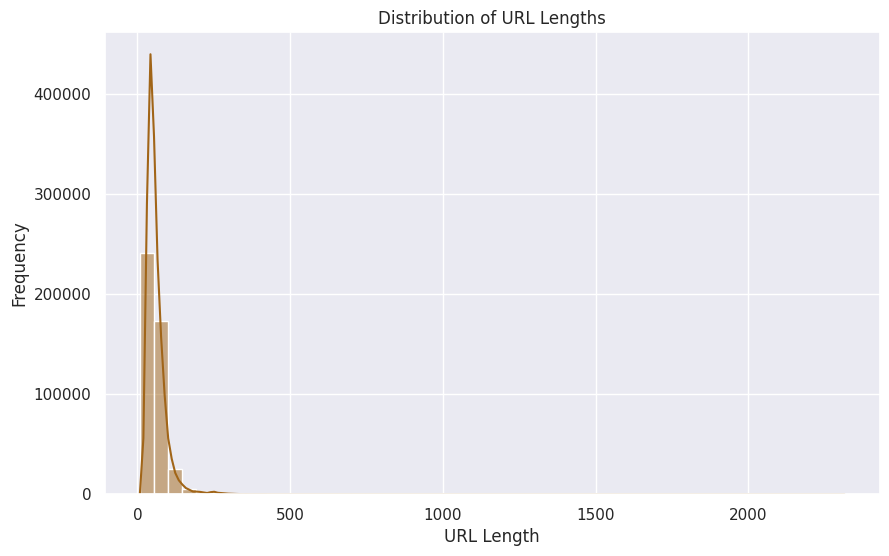

In [ ]:
urls_data['url_length'] = urls_data['url'].apply(lambda x: len(x))
plt.figure(figsize=(10,6))
sns.histplot(urls_data['url_length'], bins=50, kde=True)
plt.title('Distribution of URL Lengths')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.show()


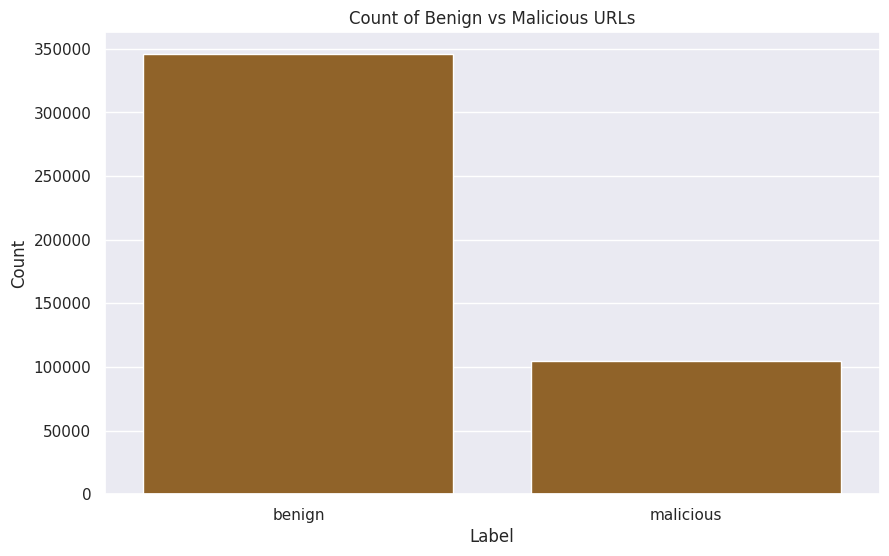

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=urls_data)
plt.title('Count of Benign vs Malicious URLs')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


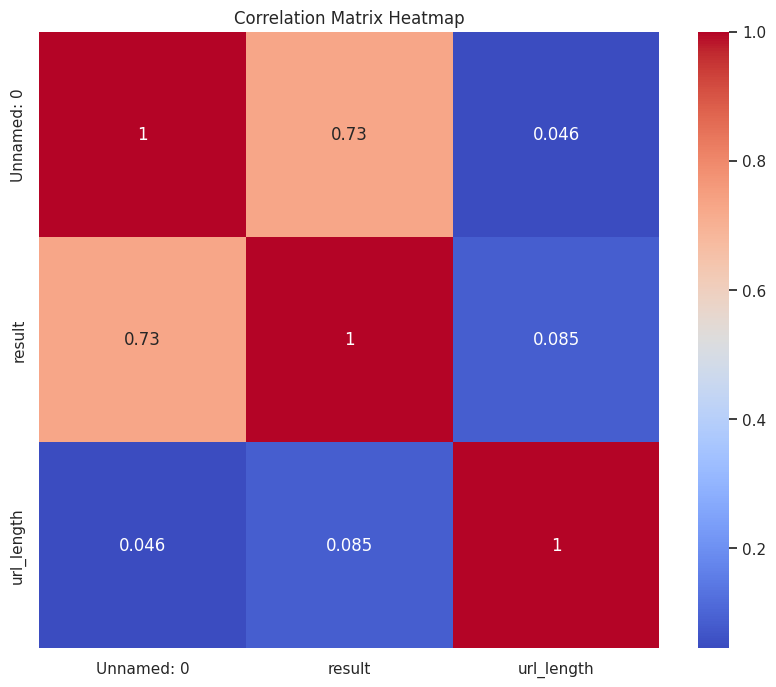

In [ ]:
# Drop non-numeric columns before calculating correlation
numeric_data = urls_data.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

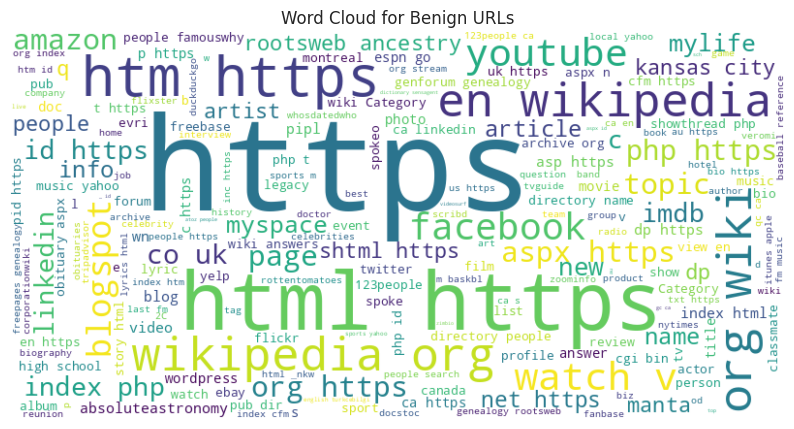

In [ ]:
#This visualization shows the most common tokens in benign URLs.


from wordcloud import WordCloud

benign_urls = ' '.join(urls_data[urls_data['label'] == 'benign']['url'].tolist())
benign_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(benign_urls)

plt.figure(figsize=(10, 6))
plt.imshow(benign_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Benign URLs')
plt.show()


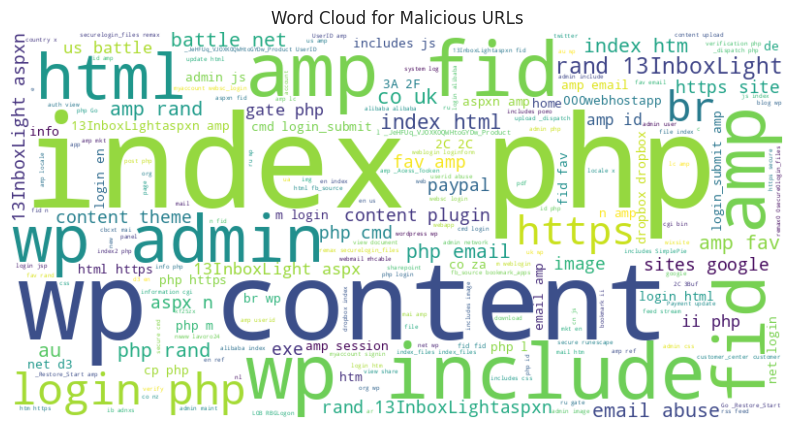

In [ ]:
malicious_urls = ' '.join(urls_data[urls_data['label'] == 'malicious']['url'].tolist())
malicious_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(malicious_urls)

plt.figure(figsize=(10, 6))
plt.imshow(malicious_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Malicious URLs')
plt.show()


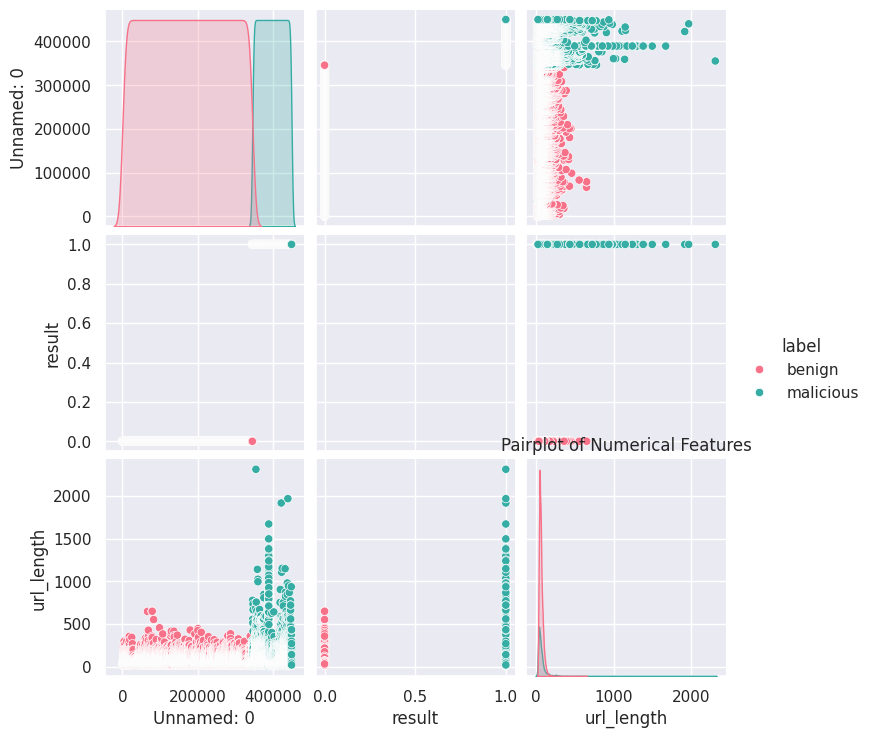

In [ ]:
sns.pairplot(urls_data, hue='label', palette='husl')
plt.title('Pairplot of Numerical Features')
plt.show()


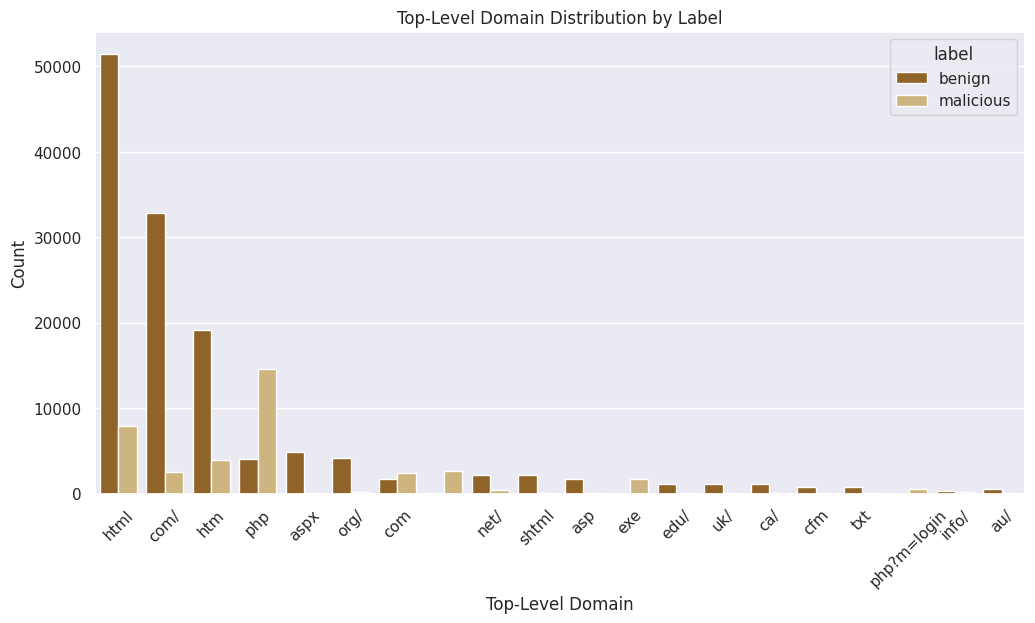

In [ ]:
urls_data['tld'] = urls_data['url'].apply(lambda x: x.split('.')[-1])
plt.figure(figsize=(12, 6))
sns.countplot(x='tld', data=urls_data, order=urls_data['tld'].value_counts().iloc[:20].index, hue='label')
plt.title('Top-Level Domain Distribution by Label')
plt.xlabel('Top-Level Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


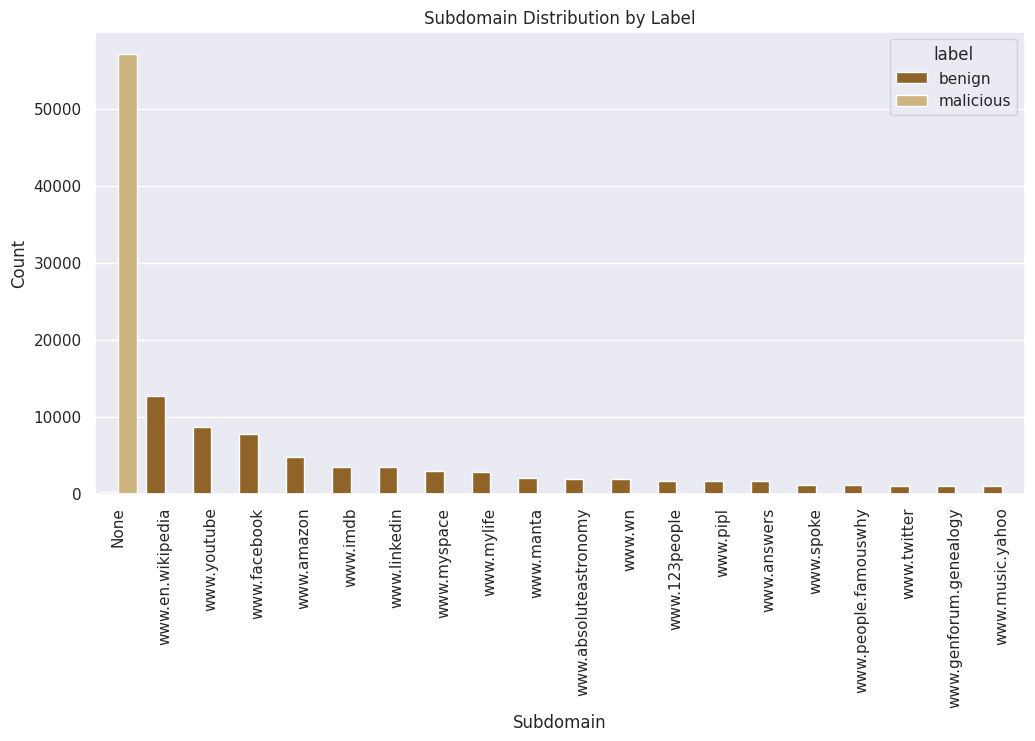

In [ ]:
urls_data['subdomain'] = urls_data['url'].apply(lambda x: x.split('/')[2].split('.')[:-1])
urls_data['subdomain'] = urls_data['subdomain'].apply(lambda x: '.'.join(x) if len(x) > 1 else 'None')
plt.figure(figsize=(12, 6))
sns.countplot(x='subdomain', data=urls_data, order=urls_data['subdomain'].value_counts().iloc[:20].index, hue='label')
plt.title('Subdomain Distribution by Label')
plt.xlabel('Subdomain')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


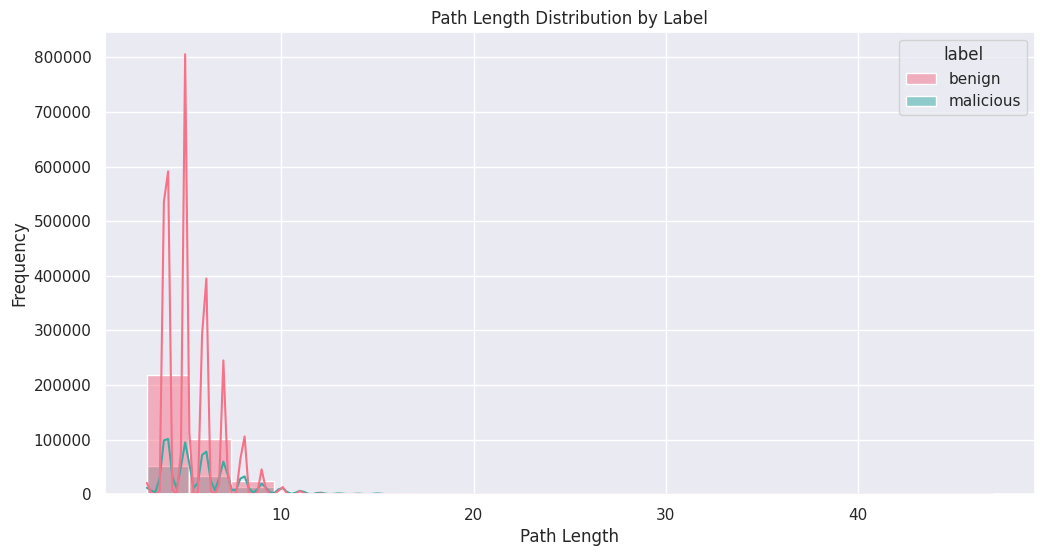

In [ ]:
urls_data['path_length'] = urls_data['url'].apply(lambda x: len(x.split('/')))
plt.figure(figsize=(12, 6))
sns.histplot(data=urls_data, x='path_length', hue='label', bins=20, kde=True, palette='husl')
plt.title('Path Length Distribution by Label')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.show()


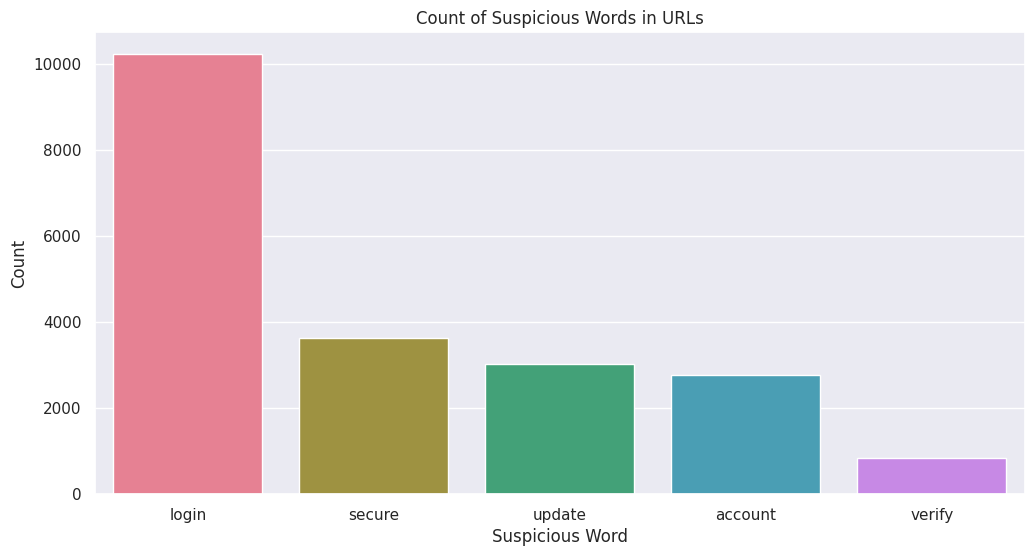

In [ ]:
suspicious_words = ['login', 'secure', 'account', 'update', 'verify']
for word in suspicious_words:
    urls_data[word] = urls_data['url'].apply(lambda x: 1 if word in x.lower() else 0)

plt.figure(figsize=(12, 6))
suspicious_counts = urls_data[suspicious_words].sum().sort_values(ascending=False)
sns.barplot(x=suspicious_counts.index, y=suspicious_counts.values, palette='husl')
plt.title('Count of Suspicious Words in URLs')
plt.xlabel('Suspicious Word')
plt.ylabel('Count')
plt.show()


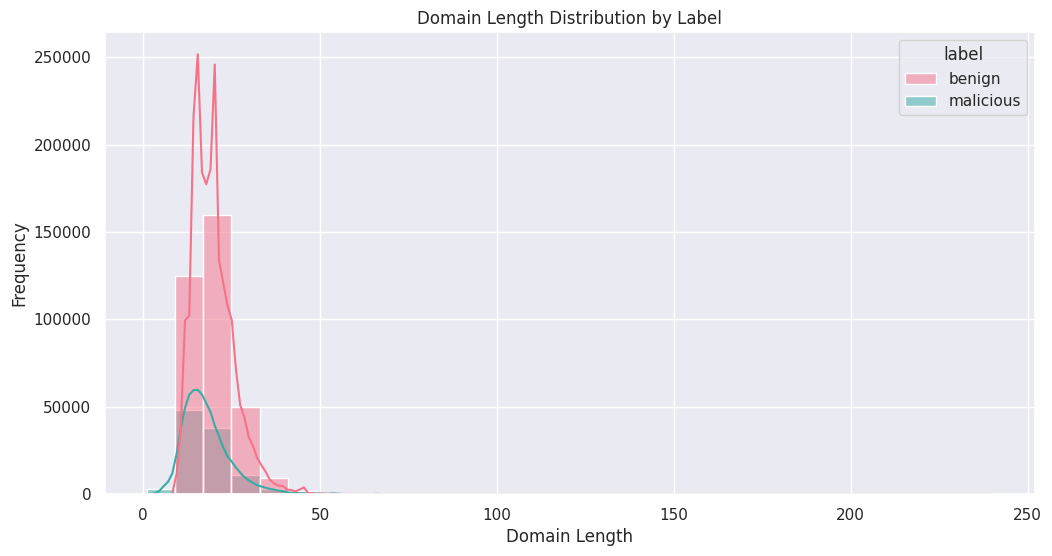

In [ ]:
urls_data['domain_length'] = urls_data['url'].apply(lambda x: len(x.split('/')[2]))
plt.figure(figsize=(12, 6))
sns.histplot(data=urls_data, x='domain_length', hue='label', bins=30, kde=True, palette='husl')
plt.title('Domain Length Distribution by Label')
plt.xlabel('Domain Length')
plt.ylabel('Frequency')
plt.show()


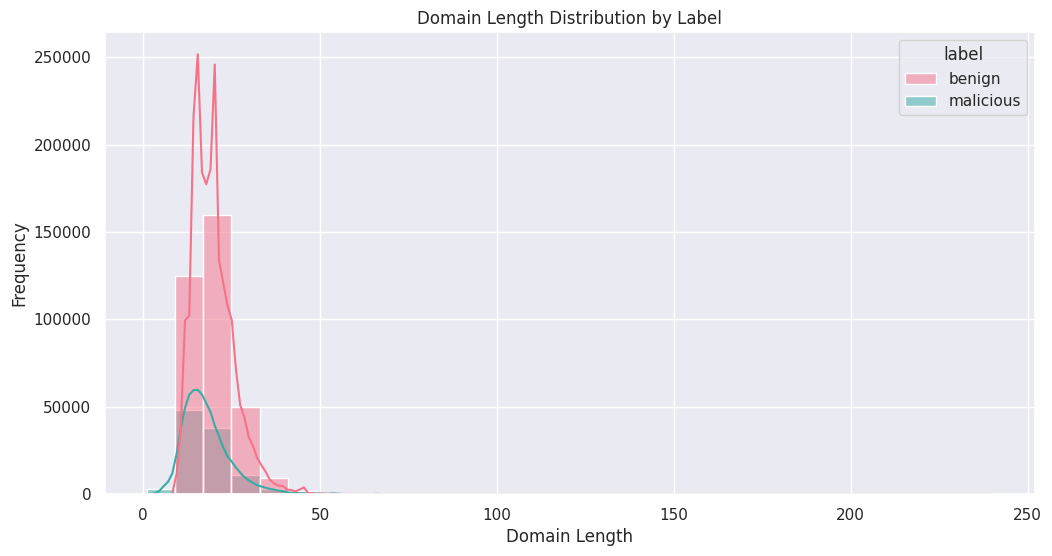

In [ ]:
urls_data['domain_length'] = urls_data['url'].apply(lambda x: len(x.split('/')[2]))
plt.figure(figsize=(12, 6))
sns.histplot(data=urls_data, x='domain_length', hue='label', bins=30, kde=True, palette='husl')
plt.title('Domain Length Distribution by Label')
plt.xlabel('Domain Length')
plt.ylabel('Frequency')
plt.show()


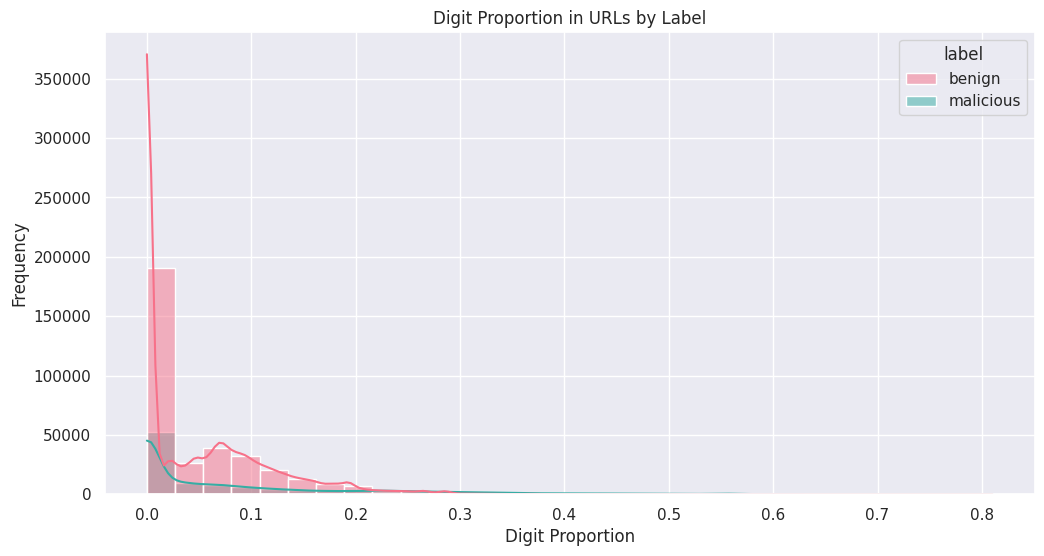

In [ ]:
urls_data['digit_count'] = urls_data['url'].apply(lambda x: sum(c.isdigit() for c in x))
urls_data['digit_proportion'] = urls_data['digit_count'] / urls_data['url'].apply(lambda x: len(x))

plt.figure(figsize=(12, 6))
sns.histplot(data=urls_data, x='digit_proportion', hue='label', bins=30, kde=True, palette='husl')
plt.title('Digit Proportion in URLs by Label')
plt.xlabel('Digit Proportion')
plt.ylabel('Frequency')
plt.show()


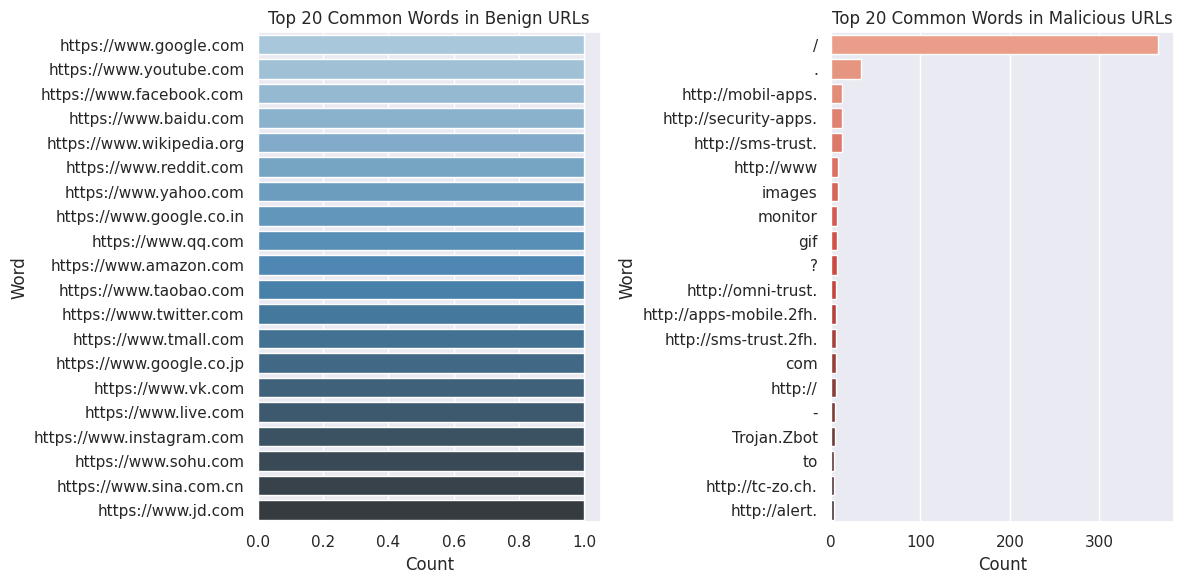

In [ ]:
from collections import Counter

def get_common_words(label):
    words = ' '.join(urls_data[urls_data['label'] == label]['url']).split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(20)
    return common_words

benign_common_words = get_common_words('benign')
malicious_common_words = get_common_words('malicious')

benign_words, benign_counts = zip(*benign_common_words)
malicious_words, malicious_counts = zip(*malicious_common_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=benign_counts, y=benign_words, palette='Blues_d')
plt.title('Top 20 Common Words in Benign URLs')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(1, 2, 2)
sns.barplot(x=malicious_counts, y=malicious_words, palette='Reds_d')
plt.title('Top 20 Common Words in Malicious URLs')
plt.xlabel('Count')
plt.ylabel('Word')

plt.tight_layout()
plt.show()
